In [1]:
from transformers import AutoTokenizer, AutoModelWithLMHead
tokenizer = AutoTokenizer.from_pretrained("mbien/recipenlg")
model = AutoModelWithLMHead.from_pretrained("mbien/recipenlg")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

/Users/danielcosta/miniconda3/envs/ml-266/lib/python3.11/site-packages/transformers/models/auto/modeling_auto.py:1949: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
/Users/danielcosta/miniconda3/envs/ml-266/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/danielcosta/miniconda3/envs/ml-266/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /Users/danielcosta/miniconda3/envs/ml-266/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/danielcosta/miniconda3/envs/ml-266/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file

model.safetensors:   0%|          | 0.00/665M [00:00<?, ?B/s]

In [153]:
import pandas as pd

recipe_nlg_dataset = pd.read_csv('./dataset/full_dataset.csv')

In [154]:
recipe_nlg_dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [155]:
for val in recipe_nlg_dataset.iloc[10180]:
    print(val)

Pineapple Coconut Pie
["4 eggs", "2 c. sugar", "1 stick margarine (soft)", "2 Tbsp. self-rising flour", "1 small can crushed pineapple", "1 small can Angel Flake coconut"]
["Combine ingredients.", "Pour into 2 prepared pie crusts.", "Bake at 300\u00b0 for 30 to 40 minutes."]
www.cookbooks.com/Recipe-Details.aspx?id=968391
Gathered
["eggs", "sugar", "margarine", "flour", "pineapple", "Angel"]


In [156]:
def get_domain(recipe_url):
    recipe_parts = recipe_url.split('/')
    domain = recipe_parts[0]
    if domain.startswith("www."):
        domain = domain[4:]
    return domain

get_domain("www.cookbooks.com/Recipe-Details.aspx?id=60089")

'cookbooks.com'

In [157]:
def has_www(recipe_url):
    return "/" in recipe_url

has_www("www.cookbooks.com/Recipe-Details.aspx?id=60089")

True

In [158]:
domains = recipe_nlg_dataset['link'].apply(get_domain)

In [159]:
domains.value_counts()

link
cookbooks.com          896341
food.com               499616
epicurious.com         129444
tastykitchen.com        78768
myrecipes.com           64895
allrecipes.com          64602
cookpad.com             61020
cookeatshare.com        59307
yummly.com              51963
tasteofhome.com         51594
foodnetwork.com         49443
food52.com              48501
kraftrecipes.com        42010
recipeland.com          24418
recipes-plus.com        20524
cooking.nytimes.com     16367
foodandwine.com         15436
seriouseats.com         12632
foodgeeks.com            8963
cookstr.com              8797
online-cookbook.com      5691
chowhound.com            5671
vegetariantimes.com      4578
delish.com               3880
landolakes.com           2492
foodrepublic.com         2259
lovefood.com             1930
Name: count, dtype: int64

In [160]:
df = recipe_nlg_dataset.copy()
print(df.shape)

(2231142, 6)


In [161]:
df_mini = df.sample(10000)
df_mini = df_mini.sort_values(by='directions', key=lambda x: -x.str.len())

In [162]:
for val in df_mini.iloc[0]:
    print(val)

Rainbow Unicorn Cake
["For the Cake Base", "1 recipe cake of your choice for the cake", "three 8 by 2-inch round cake pans for the cake", "For the Cake Decoration", "1 1/2 recipes of simple vanilla buttercream frosting (recipe follows)", "recipes of vanilla swiss meringue buttercream frosting (recipe follows)", "1/8 teaspoon gel green food coloring", "1/8 teaspoon gel pink food coloring", "1/8 teaspoon gel sky blue food coloring", "6 inches ball white fondant", "2 inches ball of pink fondant", "2 inches ball of black fondant", "For Simple Vanilla Buttercream Frosting", "2 cups unsalted butter, room temperature", "4 cups confectioners' sugar, sifted", "2 teaspoons pure vanilla extract", "1 -2 teaspoon whole milk, optional. If the buttercream is too stiff, a touch of milk will help loosen it a little", "For Vanilla Swiss Meringue Buttercream Frosting", "1 cup egg white (about 7 to 8 large eggs)", "2 1/4 cups granulated sugar", "2 teaspoons pure vanilla extract", "seeds of 1 vanilla bean 

### EDA

In [163]:
df.head()

,title,ingredients,directions,link,source,NER
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [164]:
df.describe()

,title,ingredients,directions,link,source,NER
count,2231141,2231142,2231142,2231142,2231142,2231142
unique,1312870,2226362,2211644,2231142,2,2133496
top,Chicken Casserole,"[""1 c. peanut butter"", ""1 c. sugar"", ""1 egg""]","[""Mix all ingredients together.""]",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,[]
freq,4099,28,274,1,1643098,573


### Cleaning

In [165]:
# Is '", "' the list separator?
one_ing = df[~df['ingredients'].str.contains('", "')]

print(f"Number of recipes with one ingredient: {len(one_ing)}")

for index, row in one_ing.iterrows():
    print(row['ingredients'])
    print("---"*10)

Number of recipes with one ingredient: 4102
["1 pkg. Stove Top stuffing, cooked"]
------------------------------
["roast (3 to 5 lb.)"]
------------------------------
["1 large box brownie mix"]
------------------------------
["1 pkg. Top Ramen - any flavor cuz I like them all!"]
------------------------------
["1 box Duncan Hines yellow cake mix"]
------------------------------
["1 (32 oz.) carton plain nonfat yogurt"]
------------------------------
["fresh cucumbers (firm and a good size for pickle)"]
------------------------------
["1 shot glass each: Jack Daniels, Irish cream, Kahlua, Rumplemintz Schnapps, vodka, Amaretto, Frangelico and cream"]
------------------------------
["1 pkg. soft corn tortillas (in refrigerator section)"]
------------------------------
["1 hen, washed and cut into pieces"]
------------------------------
["Desired amount of cucumbers"]
------------------------------
["poke greens"]
------------------------------
["1 box (any flavor) cake mix with pudding"]

Some of these recipes appear to be malformed, or would require tailored parsing. As they constitute a very low percentage of recipes, I'll exclude these.

In [166]:
list_sep = '", "'
df = df[df['ingredients'].str.contains(list_sep)]

What about the directions?

In [167]:
df_onedir = df[~df['directions'].str.contains(list_sep)]

print(f"Number of recipes with one direction: {len(df_onedir)}")
for index, row in df_onedir.sample(1000).iterrows():
    print(row['directions'])
    print("---"*10)

Number of recipes with one direction: 176520
["Melt butter over medium heat. Saute onion and pepper for 2-3 mins, until onion is tender. Add curry powder and crushed bouillon cube. Cook, stirring, for 1 min. Add tuna and milk. Simmer for 2-3 mins. Add cornstarch slurry and bring to a boil, stirring. Reduce heat and simmer for 3 mins. Add broccolini, spinach and lemon juice. Season. Simmer for 3 mins. Sprinkle spring onions over top. Serve."]
------------------------------
["In large mixing bowl, combine flour, sugar, baking powder, spices and salt. Thoroughly mix Hunt's sauce and soda in small bowl. Add to flour mixture. Stir in eggs, oil, nuts, raisins and fruit juice. Mix well. Pour into greased 10-inch Bundt or tube pan. Bake at 350\u00b0 for 45 to 55 minutes. Cool in pan 15 minutes before turning out on serving plate. Dust top with powdered sugar. Makes one 10-inch cake."]
------------------------------
["Place all ingredients in a pot and cook as you would plain rice."]
----------

There doesn't seem to be a consistent way to decide which punctuation denotes a separate step. Given that this is only 8% of recipes, we will discard these.

In [168]:
df = df[df['directions'].str.contains(list_sep)]

In [169]:
df_onener = df[~df['NER'].str.contains(list_sep)]

print(f"Number of recipes with one NER: {len(df_onener)}")

Number of recipes with one NER: 2905


In [170]:
df = df[df['NER'].str.contains(list_sep)]

print(f"Size of cleaned dataset: {len(df)}")

Size of cleaned dataset: 2047615


### Feature Engineering

In [171]:
# N Ingredients / N NER
# N Steps
# Break down by link/source
# Average length of step

In [172]:
# N Ingredients / N NER / N Steps

df['n_ingredients'] = df['ingredients'].apply(lambda x: len(x.split(list_sep)))
df['n_steps'] = df['directions'].apply(lambda x: len(x.split(list_sep)))
df['n_ner'] = df['NER'].apply(lambda x: len(x.split(list_sep)))

In [173]:
trim = 0.05

ingredients_high_cutoff = df['n_ingredients'].quantile(1 - trim)
steps_high_cutoff = df['n_steps'].quantile(1 - trim)
ner_high_cutoff = df['n_ner'].quantile(1 - trim)

ingredients_low_cutoff = df['n_ingredients'].quantile(trim)
steps_low_cutoff = df['n_steps'].quantile(trim)
ner_low_cutoff = df['n_ner'].quantile(trim)

print(f"5th percentile ingredients: {ingredients_low_cutoff}")
print(f"5th percentile steps: {steps_low_cutoff}")
print(f"5th percentile NER: {ner_low_cutoff}")

print(f"95th percentile ingredients: {ingredients_high_cutoff}")
print(f"95th percentile steps: {steps_high_cutoff}")
print(f"95th percentile NER: {ner_high_cutoff}")

5th percentile ingredients: 4.0
5th percentile steps: 2.0
5th percentile NER: 3.0
95th percentile ingredients: 16.0
95th percentile steps: 17.0
95th percentile NER: 16.0


In [174]:
df = df[(df['n_ingredients'] < ingredients_high_cutoff) &
          (df['n_ingredients'] > ingredients_low_cutoff) &
          (df['n_steps'] < steps_high_cutoff) &
          (df['n_steps'] > steps_low_cutoff) &
          (df['n_ner'] < ner_high_cutoff) &
          (df['n_ner'] > ner_low_cutoff)]
print(f"Size of dataset after filtering: {len(df)}")

Size of dataset after filtering: 1487956


<Axes: >

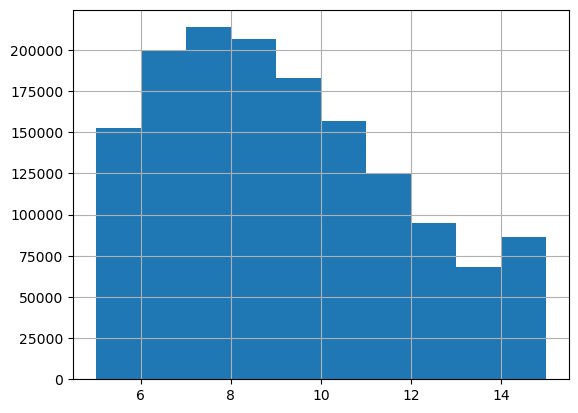

In [175]:
df.n_ingredients.hist()

In [176]:
df['domain'] = df['link'].apply(get_domain)
df.drop('link', axis=1, inplace=True)

In [177]:
df.head()

,title,ingredients,directions,source,NER,n_ingredients,n_steps,n_ner,domain
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu...",6,6,6,cookbooks.com
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo...",5,6,4,cookbooks.com
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu...",5,3,5,cookbooks.com
5,Cheeseburger Potato Soup,"[""6 baking potatoes"", ""1 lb. of extra lean gro...","[""Wash potatoes; prick several times with a fo...",Gathered,"[""baking potatoes"", ""extra lean ground beef"", ...",10,16,10,cookbooks.com
6,Rhubarb Coffee Cake,"[""1 1/2 c. sugar"", ""1/2 c. butter"", ""1 egg"", ""...","[""Cream sugar and butter."", ""Add egg and beat ...",Gathered,"[""sugar"", ""butter"", ""egg"", ""buttermilk"", ""flou...",10,6,10,cookbooks.com


<Axes: title={'center': 'Average number of ingredients per source'}, xlabel='domain'>

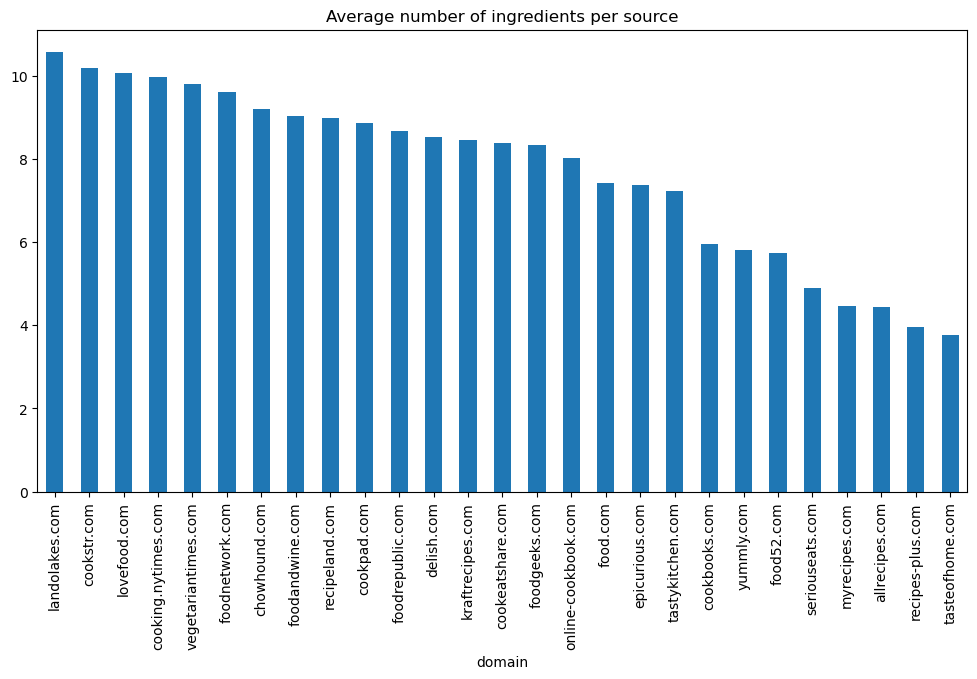

In [178]:
df.groupby('domain')['n_steps'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Average number of ingredients per source')

In [179]:
cookbooks = df[df['domain'] == 'cookbooks.com']

for index, row in cookbooks.sample(10).iterrows():
    print(row['directions'])
    print("---"*10)

["Mix flour, baking powder, butter and 1 tablespoon sugar.", "Add enough milk to make stiff like pie dough.", "Roll out, put peaches on dough and sprinkle with cinnamon and sugar.", "Roll, cut and put dumplings in pan and pour dressing over."]
------------------------------
["Slice and arrange layer of bananas evenly over the bottom of an ungreased 13 x 9 x 2-inch baking dish.", "Prepare lemon gelatin according to directions on package; pour over bananas.", "Chill in the refrigerator until solid (about 1 hour)."]
------------------------------
["Start heating oven to 350\u00b0.", "Sift flour, soda, baking powder and salt.", "Mix shortening and peanut butter.", "Beat in sugars and egg until very light and fluffy.", "Mix in flour mixture.", "Pinch off small pieces of dough, rolling each with palms of hands into roll 2-inches long.", "Place on ungreased cookie sheet.", "With tines of fork, press lengthwise.", "Bake 12 to 15 minutes."]
------------------------------
["Wash pickles and pack

In [180]:
df['avg_step_length'] = df['directions'].apply(lambda x: len(x.split()) / len(x.split(list_sep)))
df['total_step_length'] = df['directions'].apply(lambda x: len(x.split()))

In [181]:
df = df[
    (df['avg_step_length'] > df['avg_step_length'].quantile(trim)) & 
    (df['avg_step_length'] < df['avg_step_length'].quantile(1 - trim))
]

In [182]:
df = df[df['total_step_length'] < df['total_step_length'].quantile(1-trim)]

<Axes: title={'center': 'Average number of ingredients per source'}, xlabel='domain'>

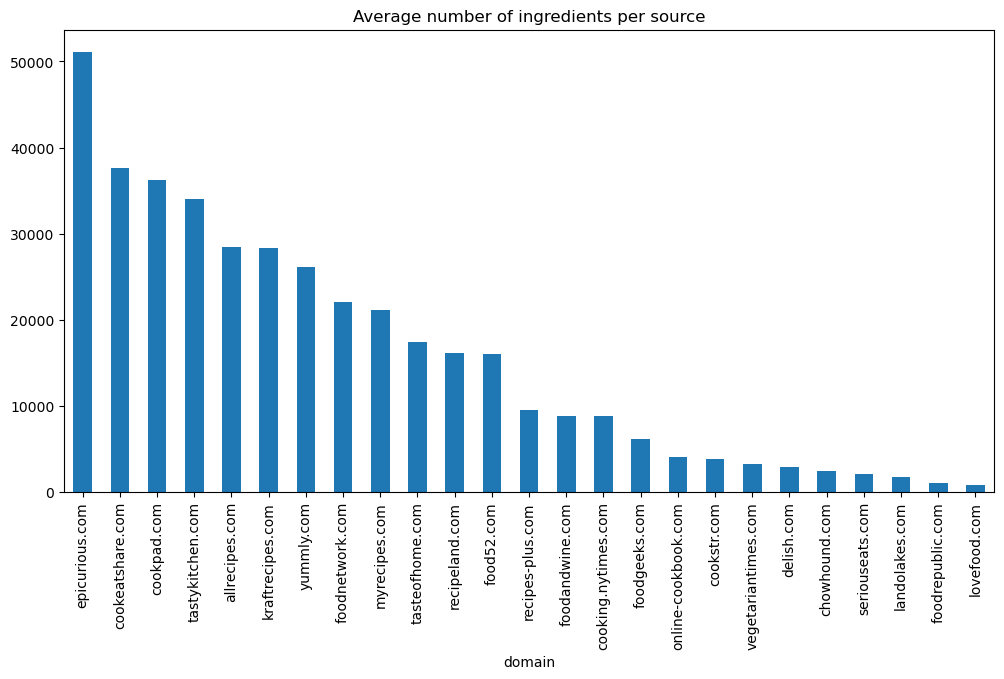

In [188]:
df_smol = df[~df['domain'].isin(['cookbooks.com', 'food.com'])]
df_smol.groupby('domain')['n_steps'].count().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Average number of ingredients per source')

In [189]:
df_smol.index.size

389875

In [190]:
df.to_csv('./dataset/cleaned_dataset.csv', index=False)
df_smol.to_csv('./dataset/cleaned_dataset_no_top_2.csv', index=False)